In [1]:
import numpy as np
import yaml
from os import path

In [2]:
from pearce.mocks.kittens import TrainingBox

In [3]:
dirname = '/u/ki/swmclau2/des/xi_gg_corrabzheng07/'

In [4]:
with open(path.join(dirname, 'config.yaml'), 'r') as f:
    cfg = yaml.load(f)

In [5]:
train_params = np.loadtxt(path.join(dirname, 'trainer_0000.npy'))

In [6]:
HOD_params = np.loadtxt(path.join(dirname, 'HOD_params.npy'))

In [7]:
cfg['HOD']

{'fixed_nd': '5e-4',
 'min_ptcl': 100,
 'model': 'corrZheng07',
 'num_hods': 1000,
 'ordered_params': {'alpha': [0.7, 1.3],
  'logM0': [12.6, 13.6],
  'logM1': [13.7, 14.7],
  'logMmin': [12.0, 16.0],
  'mean_occupation_centrals_assembias_corr1': [-1.0, 1.0],
  'mean_occupation_satellites_assembias_corr1': [-1.0, 1.0],
  'sigma_logM': [0.05, 0.5]},
 'sec_haloprop_key': 'halo_local_density_10',
 'system': 'ki-ls'}

In [8]:
cat = TrainingBox(0)

In [9]:
cat.load_catalog(1.0, particles = True)

In [10]:
cat.load_model(1.0, HOD='corrZheng07')#cfg['HOD']['model'])

/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key sigma_logM appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings across components.

If you do not wish to see this message every time you instantiate, 
simply attach a _suppress_repeated_param_warning attribute 
to any of your component models and set this variable to ``True``.

  warn(msg % key)
/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key logMmin appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In parti

In [11]:
op_dict=  cfg['HOD']['ordered_params']
del op_dict['logMmin']

In [12]:
d = dict(zip(op_dict.keys(), HOD_params[101,:]))

In [13]:
from scipy.optimize import minimize_scalar
def add_logMmin(hod_params, cat, min_ptcl = 100):
        """
        In the fixed number density case, find the logMmin value that will match the nd given hod_params
        :param: hod_params:
            The other parameters besides logMmin
        :param cat:
            the catalog in question
        :return:
            None. hod_params will have logMmin added to it.
        """
        hod_params['logMmin'] = 13.0 #initial guess
        #cat.populate(hod_params) #may be overkill, but will ensure params are written everywhere
        def func(logMmin, hod_params):
            hod_params.update({'logMmin':logMmin})
            return (cat.calc_analytic_nd(hod_params, min_ptcl=min_ptcl) - 5e-4)**2
        logMmin_bounds = [12.0, 14.0]
        res = minimize_scalar(func, bounds = logMmin_bounds, args = (hod_params,), options = {'maxiter':100}, method = 'Bounded')

        # assuming this doens't fail
        print 'logMmin', res.x
        hod_params['logMmin'] = res.x

In [14]:
add_logMmin(d, cat)

logMmin 13.097996624683347


In [15]:
cat.populate(d, min_ptcl = 100)

cen sr 0
nan sr halo_mvir
--------- [1.3160238e-06, 2.693956e-06, 3.5843645e-06, 4.239692e-06, 5.0815916e-06]
cen 0 0.2998630259438072 0.0 1.0

sat sr 0
nan sr halo_mvir
--------- [8.0312776e-07, 1.4959589e-06, 2.2685194e-06, 3.0695303e-06, 5.4573784e-06]
sat 0 0.09316435128767568 0.0 15.0



/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_in

In [16]:
cat.model.mock._total_abundance

{'centrals': 521763, 'satellites': 57706}

In [17]:
from scipy.stats import poisson

In [18]:
dist = poisson

In [19]:
dist.isf(np.linspace(0,1,10), 2)

array([inf,  4.,  3.,  2.,  2.,  2.,  1.,  1.,  0., -1.])

In [20]:
?? dist.isf

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

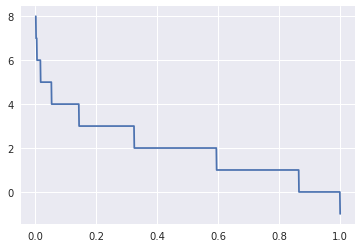

In [22]:
p = np.linspace(0,1,1000)
plt.plot(p, dist.isf(p, 2, loc = 0))

In [24]:
p = np.linspace(0,1,int(1e6))
d = dist.isf(p, 2)